### # 241,010,102       : 기저귀

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import seaborn as sns

In [6]:
import os
os.getcwd()

'/Users/we/Downloads/업무/buy it again_분석 '

./chunk/

---

In [7]:
diaper_train = pd.read_excel('diaper_train.xlsx')
diaper_test = pd.read_excel('diaper_test.xlsx')

In [8]:
diaper_train.head(3)

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
105,105,2018-01-01 00:00:26,"6,200,018","34,900","1,472,659","241,010,102",1
212,212,2018-01-01 00:00:52,"2,683,481","32,000","1,597,856","241,010,102",1
2357,2357,2018-01-01 00:03:47,"3,579,286","104,700","1,766,436","241,010,102",1


In [9]:
diaper_train.m_id.nunique()   # 약 20만명(31~32주 동안)

212550

In [10]:
train_mid = diaper_train.m_id.unique()

In [11]:
diaper_train[diaper_train.m_id == train_mid[0]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
105,105,2018-01-01 00:00:26,"6,200,018","34,900","1,472,659","241,010,102",1
3125,3125,2018-01-01 00:04:27,"6,200,018","34,900","1,472,659","241,010,102",1
732522,10732522,2018-01-24 09:44:17,"6,200,018","15,800","3,201,607","241,010,102",1


---

## # 날짜 주기별로 빼오기!

In [12]:
d = pd.date_range(start='2018-01-01', end='2018-07-31', freq='W-MON').tolist()

In [13]:
len(d)

31

In [14]:
d[0], d[-1]

(Timestamp('2018-01-01 00:00:00', freq='W-MON'),
 Timestamp('2018-07-30 00:00:00', freq='W-MON'))

In [15]:
# 일주일마다

g = []

for i in range(1, len(d)):
    g.append( diaper_train[ (d[i-1] <= diaper_train.biz_dt) & (diaper_train.biz_dt < d[i]) ].shape[0] )
    

In [16]:
g[0]

13938

In [17]:
g

[13938,
 14122,
 12429,
 13259,
 17647,
 14545,
 6482,
 13757,
 19685,
 20764,
 13700,
 14967,
 13872,
 20382,
 14816,
 17209,
 19829,
 14044,
 17084,
 22660,
 25746,
 16539,
 25188,
 16471,
 28856,
 17786,
 19566,
 18726,
 28739,
 23397]

In [18]:
g =pd.DataFrame(g)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0ce9b5c0>]],
      dtype=object)

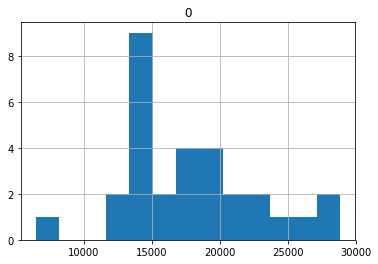

In [19]:
g.hist(bins=13)

In [20]:
g.sum()

0    536205
dtype: int64

In [21]:
# user당 1주일 구매 수

gg = g/diaper_train.m_id.nunique()

In [22]:
gg.head(10)

,0
0,0.065575
1,0.066441
2,0.058476
3,0.062381
4,0.083025
5,0.068431
6,0.030496
7,0.064724
8,0.092614
9,0.097690


In [23]:
gg.mean()

0    0.084091
dtype: float64

In [24]:
# 그럼 평균 몇주일에 한번 살까?   - 11주라고? 말도안돼

1/gg.mean()

0    11.891907
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0d83a4e0>]],
      dtype=object)

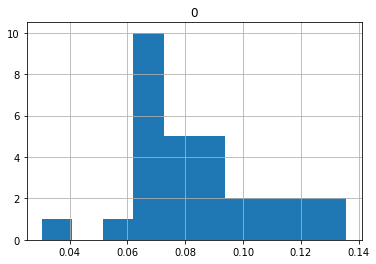

In [25]:
gg.hist()

---

In [1]:
xxxx = [1,2,3,4]

In [3]:
for i in range(len(xxxx)):
    print(i)

0
1
2
3


In [26]:
# 7월 31일까지 하루씩!

dd = pd.date_range(start='2018-01-01', end='2018-08-01')

In [27]:
dd = dd.tolist()

In [28]:
dd

[Timestamp('2018-01-01 00:00:00', freq='D'),
 Timestamp('2018-01-02 00:00:00', freq='D'),
 Timestamp('2018-01-03 00:00:00', freq='D'),
 Timestamp('2018-01-04 00:00:00', freq='D'),
 Timestamp('2018-01-05 00:00:00', freq='D'),
 Timestamp('2018-01-06 00:00:00', freq='D'),
 Timestamp('2018-01-07 00:00:00', freq='D'),
 Timestamp('2018-01-08 00:00:00', freq='D'),
 Timestamp('2018-01-09 00:00:00', freq='D'),
 Timestamp('2018-01-10 00:00:00', freq='D'),
 Timestamp('2018-01-11 00:00:00', freq='D'),
 Timestamp('2018-01-12 00:00:00', freq='D'),
 Timestamp('2018-01-13 00:00:00', freq='D'),
 Timestamp('2018-01-14 00:00:00', freq='D'),
 Timestamp('2018-01-15 00:00:00', freq='D'),
 Timestamp('2018-01-16 00:00:00', freq='D'),
 Timestamp('2018-01-17 00:00:00', freq='D'),
 Timestamp('2018-01-18 00:00:00', freq='D'),
 Timestamp('2018-01-19 00:00:00', freq='D'),
 Timestamp('2018-01-20 00:00:00', freq='D'),
 Timestamp('2018-01-21 00:00:00', freq='D'),
 Timestamp('2018-01-22 00:00:00', freq='D'),
 Timestamp

In [29]:
dd[0]

Timestamp('2018-01-01 00:00:00', freq='D')

In [30]:
len(dd)

213

In [31]:
dd[212]

Timestamp('2018-08-01 00:00:00', freq='D')

In [32]:
# 하루마다

ggg = []
uuu = []
for i in range(1, len(dd)):
       
    ggg.append(diaper_train[ (dd[i-1] <= diaper_train.biz_dt) & (diaper_train.biz_dt < dd[i]) ].shape[0])
    uuu.append(diaper_train[ (dd[i-1] <= diaper_train.biz_dt) & (diaper_train.biz_dt < dd[i]) ].m_id.nunique())

In [33]:
diaper_train.m_id.nunique()

212550

In [34]:
len(ggg)

212

In [35]:
sum(ggg)

545775

In [36]:
diaper_train.shape[0]

545775

In [37]:
ggg[:10]

[2638, 1960, 1878, 1928, 1981, 939, 2614, 2741, 2632, 1468]

In [38]:
uuu[:10]

[2479, 1864, 1757, 1826, 1815, 882, 2457, 2597, 2402, 1386]

In [39]:
ggg =pd.DataFrame(ggg)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0cb1d1d0>]],
      dtype=object)

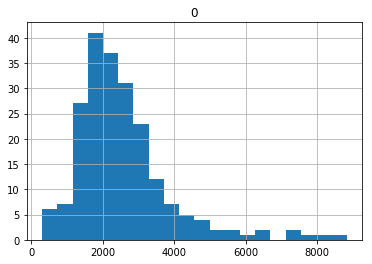

In [40]:
# 하루당 기저귀 거래분포


ggg.hist(bins = 20)

### # 그렇다면, 하루당 '구매건수/구매자수'로 scaling해볼까?

In [41]:
uuu = pd.DataFrame(uuu)

In [42]:
scal = ggg/uuu

In [43]:
scal.head()

,0
0,1.064139
1,1.051502
2,1.068867
3,1.055860
4,1.091460


In [44]:
#1주일 단위로 변환

scal7 = scal*7

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0daf5ba8>]],
      dtype=object)

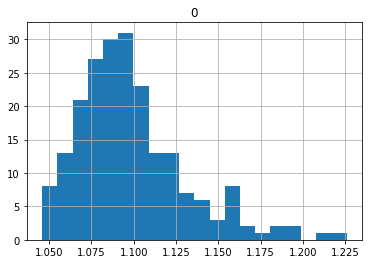

In [45]:
scal.hist(bins = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0e066da0>]],
      dtype=object)

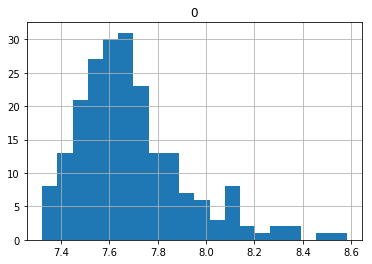

In [46]:
scal7.hist(bins = 20)

---

### # 그렇다면, 하루당 '구매건수/(전체)구매자수'로 scaling해볼까?

In [47]:
scal = ggg/diaper_train.m_id.nunique()

In [48]:
scal.head()

,0
0,0.012411
1,0.009221
2,0.008836
3,0.009071
4,0.009320


In [49]:
import scipy.stats as stats
stats.gamma.fit(scal, floc=0) 

(4.29526943405729, 0, 0.002819851621032652)

In [50]:
1/0.002819851621032652

354.6285884481369

In [420]:
#1주일 단위로 변환

scal7 = scal*7

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20e45d68>]],
      dtype=object)

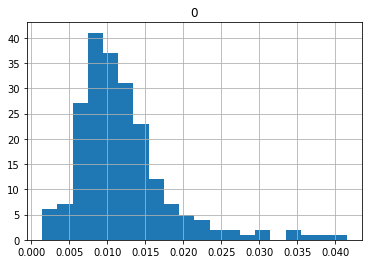

In [421]:
scal.hist(bins = 20)

In [423]:
scal.mean()

0    0.012112
dtype: float64

In [426]:
1/scal.mean()      # 82일이라는 소리야?   - 이상한데

0    82.562594
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22cb8c50>]],
      dtype=object)

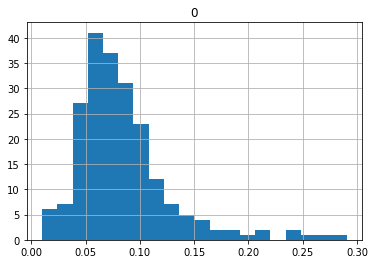

In [422]:
scal7.hist(bins = 20)

In [424]:
scal7.mean()

0    0.084784
dtype: float64

In [425]:
1/scal7.mean()  ### 11주라는 소리야?   - 이상한데

0    11.794656
dtype: float64

In [2]:
11.794656*7

82.562592

---

---

In [196]:
tt = pd.read_csv('diaper_t.csv')

In [198]:
tt = tt.iloc[:,1:]

In [199]:
# 데이터 확인

tt.tail(10)   # 음 ... 꼬리에는 구매 데이터가 없으니깐 그런가봐

,0
545765,NaN
545766,NaN
545767,NaN
545768,NaN
545769,NaN
545770,NaN
545771,NaN
545772,NaN
545773,NaN
545774,NaN


In [201]:
tt.shape   # 54만개의 time interval

(545775, 1)

---

# # t (interval) 분석해보자

In [10]:
tt.shape

(545775, 1)

In [203]:
tt = tt.dropna()  # t값 순수하게 얻은거야

In [204]:
# nan값 제거하고 얻은 shape

tt.shape

(333225, 1)

In [205]:
tt.head()

,0
1,0.0
2,23.0
4,59.0
5,0.0
6,31.0


In [206]:
# time 으로 column명 변경
tt.columns = ['time']

In [207]:
tt.head(5)

,time
1,0.0
2,23.0
4,59.0
5,0.0
6,31.0


In [208]:
#음.. 여기도 0인값이 많구나? - 무려 5만개야

tt.time.value_counts()

0.0      57461
14.0      6597
20.0      6597
21.0      6572
15.0      6335
17.0      6236
18.0      6232
13.0      6209
19.0      6181
27.0      6042
16.0      5940
28.0      5882
22.0      5860
23.0      5682
26.0      5579
24.0      5531
12.0      5476
25.0      5429
29.0      5348
1.0       4994
11.0      4833
30.0      4809
10.0      4765
31.0      4498
9.0       4374
8.0       4236
32.0      4166
7.0       4122
33.0      4075
2.0       4018
         ...  
176.0       45
185.0       38
193.0       37
180.0       35
184.0       34
175.0       34
186.0       30
191.0       27
190.0       26
192.0       26
187.0       25
194.0       24
189.0       24
188.0       24
197.0       21
199.0       21
204.0       18
196.0       16
200.0       15
198.0       13
195.0       13
202.0       13
201.0       12
203.0       11
206.0        9
205.0        7
210.0        6
209.0        5
207.0        5
208.0        3
Name: time, Length: 211, dtype: int64

histogram : 와... 0이 너무많아!

In [209]:
tmean = tt.mean()

In [210]:
# 0을 포함했을때의 평균.. 어느정도 될까?

tmean

time    29.54763
dtype: float64

# # drop 0 value : t

In [211]:
# 0인것을 드랍하는 작업!

tt_drop0 = tt[(tt[['time']] != 0).all(axis=1)]

In [212]:
tt_drop0.head()

,time
2,23.0
4,59.0
6,31.0
7,23.0
8,60.0


---

## # <U>test id 데이터에서 뽑아오자</U>

In [216]:
# diaper_test에서 unique한거 순차적으로 1000개를, test_id로

test_id = diaper_test.m_id.unique()[:1000]

In [217]:
len(test_id)

1000

In [218]:
# 마지막 테스트 아이디 확인 

diaper_test[diaper_test.m_id == test_id[1000-1]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
9313038,99313038,2018-08-01 10:47:51,"22,776,930","29,900","3,368,595","241,010,102",1


---

In [219]:
# test_id 1000개중에서, train기록 가지고있는 애들만 활용해본다!

tf = []
for i in range(len(test_id)):
    tf.append( (diaper_train[diaper_train.m_id == test_id[i]].shape[0]) 
              & (diaper_test[diaper_test.m_id == test_id[i]].shape[0]) == True) #train, test 둘다 있는 아이디를 밝혀주는 index만들어주는거야.

In [220]:
tf

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 Fa

In [221]:
len(test_id)

1000

In [222]:
len(test_id[tf])   # train data를 가지고있는 애들은 204개 정도야!

204

In [223]:
test_id_ = test_id[tf]

---

---

In [228]:
current_l = pd.date_range('2018-08-01', periods=30).tolist()

In [225]:
# 함수로 출력되는게 많게했어!

def func_lamb(train, test, test_id, current, alpha, beta, tmean):
    t_ = (current - train[train.m_id == test_id].iloc[-1].biz_dt).days  # 구매이력이 없는사람은?(고려해야해) - 지금은 있는 사람만.
    t_purch = (train[train.m_id == test_id].iloc[-1].biz_dt - train[train.m_id == test_id].iloc[0].biz_dt).days
    k = train.biz_dt[train.m_id == test_id].shape[0] # train 구매이력
    if k <= 1 :
        tmean_u = tmean # tmean : 모든 user들의 상품에대한 평균 t(구매이력이 한번밖에 없으니, user의 고유 평균 t값 대입할 수 없다.)
    else:
        tmean_u = train.biz_dt[train.m_id == test_id].diff().mean().days
    lamb = (k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta)
    return lamb, t_, t_purch, tmean_u, k

In [229]:
for j in range(len(test_id_[:10])):
    for i in range(30):
        lamb, t_, t_purch, tmean_u, k = func_lamb(train = diaper_train, test = diaper_test, test_id=test_id_[j], 
                  alpha = alpha , beta=1/scale , tmean = tt_drop0.mean().item() , current=current_l[i])
        
        if i == 0:
            print('last order:', diaper_train.biz_dt[diaper_train.m_id == test_id_[j]][-1:])
        print('current:',current_l[i], 'current-last_order:', t_ , 't_purch:', t_purch)  
        print('pred:',(1-stats.poisson.pmf(mu = lamb, k=0)),', tmean_u:',tmean_u,', k:',k ,'\n')
    
    print('------------------------------------------------------------------------')
    print('\n')

last order: 5853334   2018-03-01 00:41:34
Name: biz_dt, dtype: datetime64[ns]
current: 2018-08-01 00:00:00 current-last_order: 152 t_purch: 59
pred: 0.9250246440894359 , tmean_u: 29 , k: 3 

current: 2018-08-02 00:00:00 current-last_order: 153 t_purch: 59
pred: 0.92417796226782 , tmean_u: 29 , k: 3 

current: 2018-08-03 00:00:00 current-last_order: 154 t_purch: 59
pred: 0.9233291513682943 , tmean_u: 29 , k: 3 

current: 2018-08-04 00:00:00 current-last_order: 155 t_purch: 59
pred: 0.922478256146507 , tmean_u: 29 , k: 3 

current: 2018-08-05 00:00:00 current-last_order: 156 t_purch: 59
pred: 0.9216253209313489 , tmean_u: 29 , k: 3 

current: 2018-08-06 00:00:00 current-last_order: 157 t_purch: 59
pred: 0.9207703896250781 , tmean_u: 29 , k: 3 

current: 2018-08-07 00:00:00 current-last_order: 158 t_purch: 59
pred: 0.9199135057035974 , tmean_u: 29 , k: 3 

current: 2018-08-08 00:00:00 current-last_order: 159 t_purch: 59
pred: 0.9190547122168746 , tmean_u: 29 , k: 3 

current: 2018-08-09 0

current: 2018-08-09 00:00:00 current-last_order: 151 t_purch: 0
pred: 0.9543206592525721 , tmean_u: 35.704475566063735 , k: 1 

current: 2018-08-10 00:00:00 current-last_order: 152 t_purch: 0
pred: 0.9535862488574328 , tmean_u: 35.704475566063735 , k: 1 

current: 2018-08-11 00:00:00 current-last_order: 153 t_purch: 0
pred: 0.9528477652447004 , tmean_u: 35.704475566063735 , k: 1 

current: 2018-08-12 00:00:00 current-last_order: 154 t_purch: 0
pred: 0.952105267207763 , tmean_u: 35.704475566063735 , k: 1 

current: 2018-08-13 00:00:00 current-last_order: 155 t_purch: 0
pred: 0.9513588132882759 , tmean_u: 35.704475566063735 , k: 1 

current: 2018-08-14 00:00:00 current-last_order: 156 t_purch: 0
pred: 0.9506084617642325 , tmean_u: 35.704475566063735 , k: 1 

current: 2018-08-15 00:00:00 current-last_order: 157 t_purch: 0
pred: 0.9498542706385875 , tmean_u: 35.704475566063735 , k: 1 

current: 2018-08-16 00:00:00 current-last_order: 158 t_purch: 0
pred: 0.949096297628416 , tmean_u: 35.704

current: 2018-08-17 00:00:00 current-last_order: 18 t_purch: 11
pred: 0.9980070721848336 , tmean_u: 5 , k: 3 

current: 2018-08-18 00:00:00 current-last_order: 19 t_purch: 11
pred: 0.9978747031544632 , tmean_u: 5 , k: 3 

current: 2018-08-19 00:00:00 current-last_order: 20 t_purch: 11
pred: 0.9977365240255545 , tmean_u: 5 , k: 3 

current: 2018-08-20 00:00:00 current-last_order: 21 t_purch: 11
pred: 0.9975924361050157 , tmean_u: 5 , k: 3 

current: 2018-08-21 00:00:00 current-last_order: 22 t_purch: 11
pred: 0.9974423443227513 , tmean_u: 5 , k: 3 

current: 2018-08-22 00:00:00 current-last_order: 23 t_purch: 11
pred: 0.9972861572779781 , tmean_u: 5 , k: 3 

current: 2018-08-23 00:00:00 current-last_order: 24 t_purch: 11
pred: 0.9971237872763339 , tmean_u: 5 , k: 3 

current: 2018-08-24 00:00:00 current-last_order: 25 t_purch: 11
pred: 0.996955150358207 , tmean_u: 5 , k: 3 

current: 2018-08-25 00:00:00 current-last_order: 26 t_purch: 11
pred: 0.9967801663187222 , tmean_u: 5 , k: 3 

cu

current: 2018-08-21 00:00:00 current-last_order: 63 t_purch: 0
pred: 0.9966040330479039 , tmean_u: 35.704475566063735 , k: 1 

current: 2018-08-22 00:00:00 current-last_order: 64 t_purch: 0
pred: 0.9964159943428598 , tmean_u: 35.704475566063735 , k: 1 

current: 2018-08-23 00:00:00 current-last_order: 65 t_purch: 0
pred: 0.9962213702033103 , tmean_u: 35.704475566063735 , k: 1 

current: 2018-08-24 00:00:00 current-last_order: 66 t_purch: 0
pred: 0.9960200950635547 , tmean_u: 35.704475566063735 , k: 1 

current: 2018-08-25 00:00:00 current-last_order: 67 t_purch: 0
pred: 0.9958121071281338 , tmean_u: 35.704475566063735 , k: 1 

current: 2018-08-26 00:00:00 current-last_order: 68 t_purch: 0
pred: 0.9955973483506412 , tmean_u: 35.704475566063735 , k: 1 

current: 2018-08-27 00:00:00 current-last_order: 69 t_purch: 0
pred: 0.9953757644070425 , tmean_u: 35.704475566063735 , k: 1 

current: 2018-08-28 00:00:00 current-last_order: 70 t_purch: 0
pred: 0.9951473046638907 , tmean_u: 35.704475566

current: 2018-08-24 00:00:00 current-last_order: 55 t_purch: 0
pred: 0.9978803850716003 , tmean_u: 35.704475566063735 , k: 1 

current: 2018-08-25 00:00:00 current-last_order: 56 t_purch: 0
pred: 0.9977422151052306 , tmean_u: 35.704475566063735 , k: 1 

current: 2018-08-26 00:00:00 current-last_order: 57 t_purch: 0
pred: 0.9975981203650753 , tmean_u: 35.704475566063735 , k: 1 

current: 2018-08-27 00:00:00 current-last_order: 58 t_purch: 0
pred: 0.9974480051552812 , tmean_u: 35.704475566063735 , k: 1 

current: 2018-08-28 00:00:00 current-last_order: 59 t_purch: 0
pred: 0.9972917774724437 , tmean_u: 35.704475566063735 , k: 1 

current: 2018-08-29 00:00:00 current-last_order: 60 t_purch: 0
pred: 0.9971293490433722 , tmean_u: 35.704475566063735 , k: 1 

current: 2018-08-30 00:00:00 current-last_order: 61 t_purch: 0
pred: 0.9969606353539723 , tmean_u: 35.704475566063735 , k: 1 

------------------------------------------------------------------------


last order: 9742468   2018-06-01 07:

---

# # product로 추천할 수 있는지 조사
: 1월달에 있었던 기저귀 제품 중, 8월달에는 얼마나 남아있나?

In [231]:
diaper_train.head()

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
105,105,2018-01-01 00:00:26,"6,200,018","34,900","1,472,659","241,010,102",1
212,212,2018-01-01 00:00:52,"2,683,481","32,000","1,597,856","241,010,102",1
2357,2357,2018-01-01 00:03:47,"3,579,286","104,700","1,766,436","241,010,102",1
3125,3125,2018-01-01 00:04:27,"6,200,018","34,900","1,472,659","241,010,102",1
3831,3831,2018-01-01 00:05:09,"1,385,545","69,800","1,811,080","241,010,102",1


In [234]:
pd.to_datetime('2018-02-01')

Timestamp('2018-02-01 00:00:00')

---

In [235]:
# 1월 기저귀 품목데이터

xx = diaper_train[diaper_train.biz_dt < pd.to_datetime('2018-02-01')]

In [238]:
# 1월 기저귀 prod_no

prod_01 = xx.prod_no.unique()

In [239]:
len(prod_01)

327

In [272]:
# 1월달에 이정도의 품목이 있었어.

prod_01

array(['1,472,659', '1,597,856', '1,766,436', '1,811,080', '1,600,881',
       '3,104,762', '1,811,230', '1,981,543', '2,309,750', '3,091,892',
       '1,675,988', '2,113,825', '2,491,515', '1,739,642', '1,658,688',
       '2,350,730', '3,042,597', '1,656,962', '2,485,221', '1,904,746',
       '1,672,583', '1,657,006', '1,668,329', '1,463,631', '1,756,982',
       '1,657,016', '1,656,921', '2,025,023', '1,846,247', '2,491,179',
       '1,673,954', '2,436,515', '3,104,287', '2,122,547', '1,868,040',
       '3,010,318', '1,484,976', '2,749,563', '1,672,614', '1,499,606',
       '1,536,509', '1,489,263', '1,776,785', '1,432,189', '1,811,711',
       '1,588,372', '3,034,509', '1,588,367', '2,288,100', '2,352,933',
       '2,334,032', '2,536,288', '1,656,878', '3,044,920', '1,463,148',
       '1,829,016', '1,588,824', '1,856,478', '2,938,151', '1,814,676',
       '1,564,947', '1,811,234', '1,669,754', '1,909,501', '2,101,862',
       '2,965,281', '2,798,250', '1,657,253', '2,981,459', '1,53

In [245]:
diaper_test.prod_no.nunique()

895

In [331]:
tf = []

for i in range(len(prod_01)):
    tf.append( bool(diaper_test[diaper_test.prod_no == prod_01[i]].shape[0]) == True) #train, test 둘다 있는 아이디를 밝혀주는 index만들어주는거야.
    
    

In [332]:
prod_01[tf].shape[0]/ prod_01.shape[0]   ### 42퍼센트 살아남았다!!

0.42507645259938837

: 추가적으로 월별로 얼마나 빠져나가는지 궁금한데? - 살펴보자

---

### # 2월 얼마나 살아남나?

In [275]:
xx_02 = diaper_train[(pd.to_datetime('2018-02-01') <= diaper_train.biz_dt) & (diaper_train.biz_dt < pd.to_datetime('2018-03-01'))]

In [277]:
xx_02.tail()

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
5827701,25827701,2018-02-28 23:58:58,"5,079,622","33,900","3,353,505","241,010,102",1
5827729,25827729,2018-02-28 23:59:00,"4,730,040","26,900","3,335,124","241,010,102",1
5827759,25827759,2018-02-28 23:59:03,"8,766,613","68,000","1,658,688","241,010,102",1
5827764,25827764,2018-02-28 23:59:03,"2,312,236","13,900","3,342,768","241,010,102",1
5828228,25828228,2018-02-28 23:59:45,"8,352,887","24,700","3,353,505","241,010,102",1


In [333]:
xx_02.prod_no.nunique()

310

In [278]:
tf = []

for i in range(len(prod_01)):
    tf.append( bool(xx_02[xx_02.prod_no == prod_01[i]].shape[0]) == True) #train, test 둘다 있는 아이디를 밝혀주는 index만들어주는거야.
    
    

In [281]:
prod_01[tf].shape[0] / prod_01.shape[0] ####약 72퍼센트 살아남네

0.7247706422018348

---

### # 3월 얼마나 살아남나?

In [282]:
xx_03 = diaper_train[(pd.to_datetime('2018-03-01') <= diaper_train.biz_dt) & (diaper_train.biz_dt < pd.to_datetime('2018-04-01'))]

In [283]:
xx_03.tail()

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
124713,40124713,2018-03-31 23:58:32,"16,332,306","19,800","3,477,088","241,010,102",1
124716,40124716,2018-03-31 23:58:33,"6,640,993","9,900","3,477,088","241,010,102",1
124916,40124916,2018-03-31 23:58:55,"10,715,968","9,900","3,477,088","241,010,102",1
124999,40124999,2018-03-31 23:59:05,"3,124,196","38,000","1,658,688","241,010,102",1
125138,40125138,2018-03-31 23:59:23,"2,877,648","9,900","3,477,088","241,010,102",1


In [334]:
xx_03.prod_no.nunique()

421

In [284]:
tf = []

for i in range(len(prod_01)):
    tf.append( bool(xx_03[xx_03.prod_no == prod_01[i]].shape[0]) == True) #train, test 둘다 있는 아이디를 밝혀주는 index만들어주는거야.
    
    

In [309]:
prod_01[tf].shape[0] / prod_01.shape[0] ####약 70퍼센트 살아남네

0.7064220183486238

---

### # 4월 얼마나 살아남나?

In [310]:
xx_04 = diaper_train[(pd.to_datetime('2018-04-01') <= diaper_train.biz_dt) & (diaper_train.biz_dt < pd.to_datetime('2018-05-01'))]

In [312]:
xx_04.head(), xx_04.tail()

(        Unnamed: 0              biz_dt        m_id order_price    prod_no  \
 125564    40125564 2018-04-01 00:00:37  13,297,262       9,900  3,477,088   
 125576    40125576 2018-04-01 00:00:41   6,165,297      29,000  3,310,326   
 125619    40125619 2018-04-01 00:00:56   3,191,851      50,700  3,205,978   
 125707    40125707 2018-04-01 00:01:07  20,916,219      73,800  3,360,887   
 126047    40126047 2018-04-01 00:01:59   5,219,133      15,000  2,113,825   
 
        old_admin_category_id  serv_cd  
 125564           241,010,102        1  
 125576           241,010,102        1  
 125619           241,010,102        1  
 125707           241,010,102        1  
 126047           241,010,102        1  ,
          Unnamed: 0              biz_dt        m_id order_price    prod_no  \
 5061923    55061923 2018-04-30 23:58:49   4,773,256      35,900  3,272,368   
 5062093    55062093 2018-04-30 23:58:58   4,807,452      19,600  3,621,372   
 5062180    55062180 2018-04-30 23:59:02   3,2

In [335]:
xx_04.prod_no.nunique()

478

In [313]:
tf = []

for i in range(len(prod_01)):
    tf.append( bool(xx_04[xx_04.prod_no == prod_01[i]].shape[0]) == True) #train, test 둘다 있는 아이디를 밝혀주는 index만들어주는거야.
    
    

In [314]:
prod_01[tf].shape[0] / prod_01.shape[0] ####약 65퍼센트 살아남네

0.654434250764526

### # 5월 얼마나 살아남나? 

In [315]:
xx_05 = diaper_train[(pd.to_datetime('2018-05-01') <= diaper_train.biz_dt) & (diaper_train.biz_dt < pd.to_datetime('2018-06-01'))]

In [317]:
xx_05.head(), xx_05.tail()

(         Unnamed: 0              biz_dt        m_id order_price    prod_no  \
 5063232    55063232 2018-05-01 00:00:18   1,682,162      34,900  3,483,096   
 5063279    55063279 2018-05-01 00:00:23   4,854,272      23,700  3,386,182   
 5063848    55063848 2018-05-01 00:01:34   6,764,649      19,900  3,202,896   
 5064042    55064042 2018-05-01 00:01:49  12,535,121      44,100  3,621,372   
 5064187    55064187 2018-05-01 00:02:01   5,509,854      34,900  3,272,368   
 
         old_admin_category_id  serv_cd  
 5063232           241,010,102        1  
 5063279           241,010,102        1  
 5063848           241,010,102        1  
 5064042           241,010,102        1  
 5064187           241,010,102        1  ,
          Unnamed: 0              biz_dt       m_id order_price    prod_no  \
 9623840    69623840 2018-05-31 23:59:03  3,462,240      36,900  3,483,096   
 9624013    69624013 2018-05-31 23:59:16  2,122,151      23,900  1,668,329   
 9624122    69624122 2018-05-31 23:59

In [318]:
tf = []

for i in range(len(prod_01)):
    tf.append( bool(xx_05[xx_05.prod_no == prod_01[i]].shape[0]) == True) #train, test 둘다 있는 아이디를 밝혀주는 index만들어주는거야.
    
    

In [320]:
prod_01[tf].shape[0] / prod_01.shape[0] ####약 59퍼센트 살아남네

0.5902140672782875

### # 6월 얼마나 살아남나? 

In [321]:
xx_06 = diaper_train[(pd.to_datetime('2018-06-01') <= diaper_train.biz_dt) & (diaper_train.biz_dt < pd.to_datetime('2018-07-01'))]

In [322]:
xx_06.head(), xx_06.tail()

(         Unnamed: 0              biz_dt        m_id order_price    prod_no  \
 9624724    69624724 2018-06-01 00:00:21   1,310,610      35,900  3,272,368   
 9625047    69625047 2018-06-01 00:01:05   7,046,817      17,900  3,704,729   
 9625361    69625361 2018-06-01 00:01:36  11,845,104      36,900  3,272,368   
 9625621    69625621 2018-06-01 00:01:59  17,685,353      36,900  3,360,887   
 9625902    69625902 2018-06-01 00:02:27   4,236,687      21,500  2,113,825   
 
         old_admin_category_id  serv_cd  
 9624724           241,010,102        1  
 9625047           241,010,102        1  
 9625361           241,010,102        1  
 9625621           241,010,102        1  
 9625902           241,010,102        1  ,
          Unnamed: 0              biz_dt        m_id order_price    prod_no  \
 3352364    83352364 2018-06-30 23:57:20   1,495,866      67,900  3,704,356   
 3353162    83353162 2018-06-30 23:58:33   2,005,811      36,900  3,778,692   
 3353272    83353272 2018-06-30 23

In [323]:
tf = []

for i in range(len(prod_01)):
    tf.append( bool(xx_06[xx_06.prod_no == prod_01[i]].shape[0]) == True) #train, test 둘다 있는 아이디를 밝혀주는 index만들어주는거야.
    
    

In [325]:
prod_01[tf].shape[0] / prod_01.shape[0] ####약 52퍼센트 살아남네

0.5198776758409785

### # 7월 얼마나 살아남나? 

In [326]:
xx_07 = diaper_train[(pd.to_datetime('2018-07-01') <= diaper_train.biz_dt) & (diaper_train.biz_dt < pd.to_datetime('2018-08-01'))]

In [327]:
xx_07.head(), xx_07.tail()

(         Unnamed: 0              biz_dt        m_id order_price      prod_no  \
 3354293    83354293 2018-07-01 00:00:36   1,477,575     110,700    1,499,606   
 3355449    83355449 2018-07-01 00:02:20   8,789,465      19,800    3,169,721   
 3355681    83355681 2018-07-01 00:02:41  16,148,846     104,700    3,778,692   
 3356186    83356186 2018-07-01 00:03:28   3,617,058      32,900  100,002,011   
 3356637    83356637 2018-07-01 00:04:10  18,060,650      65,000    1,668,329   
 
         old_admin_category_id  serv_cd  
 3354293           241,010,102        1  
 3355449           241,010,102        1  
 3355681           241,010,102        1  
 3356186           241,010,102        2  
 3356637           241,010,102        1  ,
          Unnamed: 0              biz_dt        m_id order_price    prod_no  \
 9110014    99110014 2018-07-31 23:59:32   7,174,062      22,900  3,872,548   
 9110047    99110047 2018-07-31 23:59:35   4,901,809       3,900  3,892,082   
 9110085    99110085 2

In [336]:
xx_07.prod_no.nunique()

640

In [328]:
tf = []

for i in range(len(prod_01)):
    tf.append( bool(xx_07[xx_07.prod_no == prod_01[i]].shape[0]) == True) #train, test 둘다 있는 아이디를 밝혀주는 index만들어주는거야.
    
    

In [330]:
prod_01[tf].shape[0] / prod_01.shape[0] ####약 45퍼센트 살아남네

0.45871559633027525

### -----------------------------------------------------------------------------------------------------------------------

### # lambda 추정위해 - 월 별로, user에 따른 구매량 살펴보려고 했어.

In [287]:
xx_02 = diaper_train[(pd.to_datetime('2018-02-01') <= diaper_train.biz_dt) & (diaper_train.biz_dt < pd.to_datetime('2018-03-01'))]

In [289]:
xx_02.m_id.nunique()

44146

In [290]:
xx_02.m_id.unique()

array(['2,745,603', '13,022,956', '11,190,356', ..., '5,079,622',
       '2,312,236', '8,352,887'], dtype=object)

In [293]:
# 2월 한달동안 user 각각의 구매 횟수 count

ll = []
for i in range(len(xx_02.m_id.unique())):
    ll.append( xx_02[xx_02.m_id == xx_02.m_id.unique()[i] ].shape[0] )

In [294]:
ll

[1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 4,
 1,
 2,
 2,
 4,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 4,
 3,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 2,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a190254e0>]],
      dtype=object)

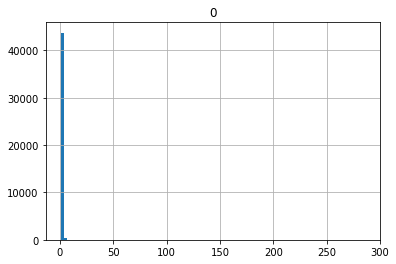

In [297]:
pd.DataFrame(ll).hist(bins = 100)


In [300]:
ll = pd.DataFrame({'x':ll})

In [301]:
ll

,x
0,1
1,1
2,1
3,2
4,1
5,1
6,1
7,1
8,1
9,1


In [302]:
ll.x.value_counts()

1      35662
2       6867
3       1184
4        271
5         82
6         37
7         22
8          6
9          4
13         2
15         2
28         1
10         1
12         1
14         1
17         1
23         1
286        1
Name: x, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c8f92b0>]],
      dtype=object)

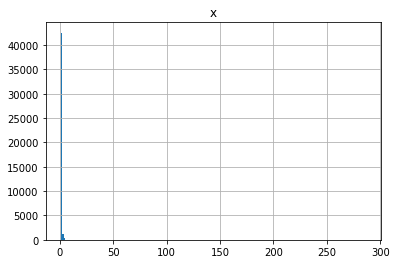

In [304]:
ll.hist(bins = 200)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ad40f60>]],
      dtype=object)

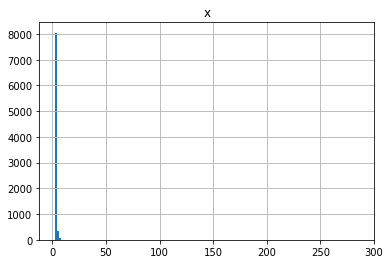

In [308]:
ll[ll.x != 1].hist(bins=150)